# WeatherPy

---

**Brief Description**: This notebook reflects the analysis of weather patterns across more than 500 cities worldwide with varying distances from the equator. The entire report is organized and presented using scatter plots by ingesting data from a public API. A short written report that summarizes the key findings for each scatter plot is also presented in this notebook. 
***
> - **Requirement 1:** Relationship between weather variables and latitude: <br>
       1. Latitude vs. Temperature <br>
       2. Latitude vs. Humidity <br>
       3. Latitude vs. Cloudiness <br>
       4. Latitude vs. Wind Speed <br>
       
> - **Requirement 2:** Linear Regression for each relationship: <br>
       1. The plots are separated across each of Northern and Southern hemispheres to compute the linear regression.<br> 
       2. A function is used for the above which is subsequently called for each relationship with relevant parameters.<br>
***     

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as pyplt
import pandas as pd
import numpy as np
import requests
import time
import sys
import scipy.stats as st
from datetime import datetime
from scipy.stats import linregress

# Set the default size of the figure to display the scatter plots used later in the analysis
pyplt.rcParams["figure.figsize"] = [10, 6]

# Minor data wrangling to support display of the current date for plots
todays_date = datetime.date(datetime.now())

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Add the path for Citipy to the Python Path
sys.path.append('C:\\Users\\Nithya Ravi\\anaconda3\\envs\\dev\\Lib\\site-packages')

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
city_units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Initialize respective lists for each of parsed data elements in the JSON response
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={city_units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country and date
        city_name.append(city_weather['name'])
        city_lat.append(city_weather['coord']['lat'])
        city_lng.append(city_weather['coord']['lon'])
        city_max_temp.append(city_weather['main']['temp_max'])
        city_humidity.append(city_weather['main']['humidity'])
        city_clouds.append(city_weather['clouds']['all'])
        city_wind.append(city_weather['wind']['speed'])
        city_country.append(city_weather['sys']['country'])
        city_date.append(city_weather['dt'])
        
    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | novodvinsk
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | happy valley-goose bay
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | manuguru
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | cacheu
Processing Record 13 of Set 1 | kristiansund
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | lodwar
Processing Record 16 of Set 1 | yanqul
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | al ghayzah
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 |

Processing Record 38 of Set 4 | enewetak
Processing Record 39 of Set 4 | caromatan
Processing Record 40 of Set 4 | ketchikan
Processing Record 41 of Set 4 | hammerfest
Processing Record 42 of Set 4 | hanzhong
Processing Record 43 of Set 4 | shagonar
Processing Record 44 of Set 4 | waddan
Processing Record 45 of Set 4 | taiohae
City not found. Skipping...
Processing Record 46 of Set 4 | sundargarh
Processing Record 47 of Set 4 | vernon
Processing Record 48 of Set 4 | labytnangi
Processing Record 49 of Set 4 | savalou
Processing Record 0 of Set 5 | aykol
City not found. Skipping...
Processing Record 1 of Set 5 | chonchi
Processing Record 2 of Set 5 | kuanda
Processing Record 3 of Set 5 | antsiranana
Processing Record 4 of Set 5 | naze
Processing Record 5 of Set 5 | cable beach
City not found. Skipping...
Processing Record 6 of Set 5 | la ronge
Processing Record 7 of Set 5 | visakhapatnam
Processing Record 8 of Set 5 | isiro
Processing Record 9 of Set 5 | dwarka
Processing Record 10 of Se

Processing Record 30 of Set 8 | paracuru
Processing Record 31 of Set 8 | dubbo
Processing Record 32 of Set 8 | hailar
Processing Record 33 of Set 8 | bestobe
Processing Record 34 of Set 8 | arrifes
Processing Record 35 of Set 8 | freetown
Processing Record 36 of Set 8 | yazman
Processing Record 37 of Set 8 | ust'-kulom
Processing Record 38 of Set 8 | pahrump
Processing Record 39 of Set 8 | puerto asis
Processing Record 40 of Set 8 | laojunmiao
Processing Record 41 of Set 8 | moab
Processing Record 42 of Set 8 | berdigestyakh
Processing Record 43 of Set 8 | maiwut
City not found. Skipping...
Processing Record 44 of Set 8 | quellon
Processing Record 45 of Set 8 | praia
Processing Record 46 of Set 8 | chabahar
Processing Record 47 of Set 8 | yuzhno-kurilsk
Processing Record 48 of Set 8 | sinop
Processing Record 49 of Set 8 | labrador city
Processing Record 0 of Set 9 | toguchin
Processing Record 1 of Set 9 | peachtree city
Processing Record 2 of Set 9 | tromso
Processing Record 3 of Set 9

Processing Record 22 of Set 12 | whitby
Processing Record 23 of Set 12 | talara
Processing Record 24 of Set 12 | kennebunk
Processing Record 25 of Set 12 | gizo
Processing Record 26 of Set 12 | anibare
City not found. Skipping...
Processing Record 27 of Set 12 | ginir
Processing Record 28 of Set 12 | aasiaat
Processing Record 29 of Set 12 | zapolyarnyy
Processing Record 30 of Set 12 | tshabong
Processing Record 31 of Set 12 | irakleion
Processing Record 32 of Set 12 | kuala terengganu
Processing Record 33 of Set 12 | biloela
Processing Record 34 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 35 of Set 12 | morinville
Processing Record 36 of Set 12 | biltine
Processing Record 37 of Set 12 | kiffa
Processing Record 38 of Set 12 | santa cruz
Processing Record 39 of Set 12 | malango
Processing Record 40 of Set 12 | new plymouth
Processing Record 41 of Set 12 | harnosand
Processing Record 42 of Set 12 | pemangkat
Processing Record 43 of Set 12 | mariental
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": city_name,
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
})

# Define a dictionary structure for header row styling
df_header_row = {
    'selector': 'th.col_heading',
    'props': 'background-color: bisque;'
}
   
# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data - minor data wrangling for hiding the index
city_data_df.head().style.hide(axis="index").set_table_styles([df_header_row])

City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Cabo San Lucas,22.890900,-109.912400,77.310000,50,20,19.570000,MX,1707345290
Novodvinsk,64.416500,40.812200,-20.220000,100,99,3.690000,RU,1707345290
Constanța,44.183300,28.650000,45.280000,68,100,13.330000,RO,1707345245
New Norfolk,-42.782600,147.058700,66.700000,54,63,3.180000,AU,1707345291
George Town,5.411200,100.335400,80.530000,93,20,3.440000,MY,1707345292


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data - minor data wrangling for hiding the index
city_data_df.head().style.hide(axis="index").set_table_styles([df_header_row])

City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Cabo San Lucas,22.890900,-109.912400,77.310000,50,20,19.570000,MX,1707345290
Novodvinsk,64.416500,40.812200,-20.220000,100,99,3.690000,RU,1707345290
Constanța,44.183300,28.650000,45.280000,68,100,13.330000,RO,1707345245
New Norfolk,-42.782600,147.058700,66.700000,54,63,3.180000,AU,1707345291
George Town,5.411200,100.335400,80.530000,93,20,3.440000,MY,1707345292


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

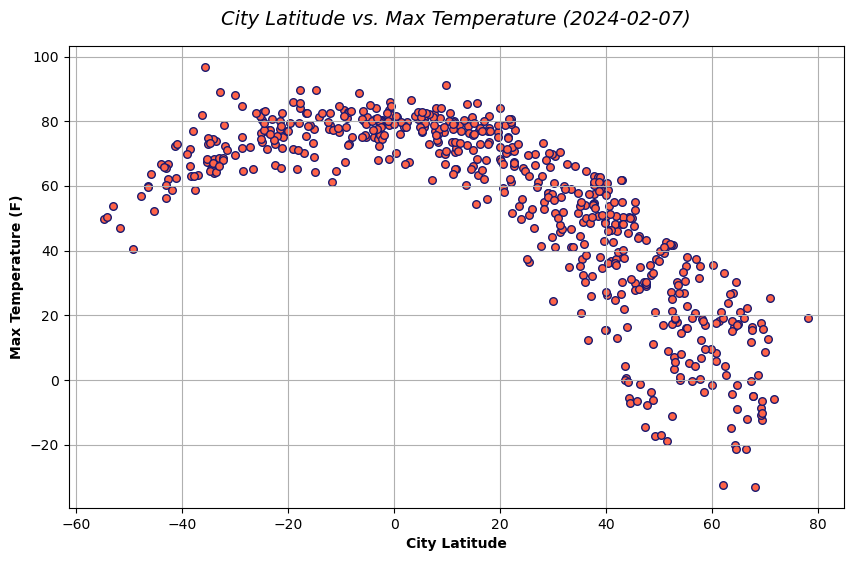

In [8]:
# Build scatter plot for latitude vs. temperature

# Step 1: Use the dataframe created above to assign the axes values for the scatter plot
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Step 2: Generate a scatter plot based with added customization
pyplt.title(f"City Latitude vs. Max Temperature ({todays_date})", fontsize = 14, fontstyle = 'italic', pad = 15)
pyplt.xlabel("City Latitude", fontsize = 10, fontweight = 'bold')
pyplt.ylabel("Max Temperature (F)", fontsize = 10, fontweight = 'bold')
pyplt.scatter(x_values, y_values, edgecolor = "midnightblue", s = 30, color = "tomato")
pyplt.grid()

# Step 3: Save the figure
pyplt.savefig("output_data/Figure 1 - City Latitude vs. Max Temperature.png", bbox_inches = 'tight', dpi = 200)

# Step 4: Display the plot
pyplt.show()

#### Latitude Vs. Humidity

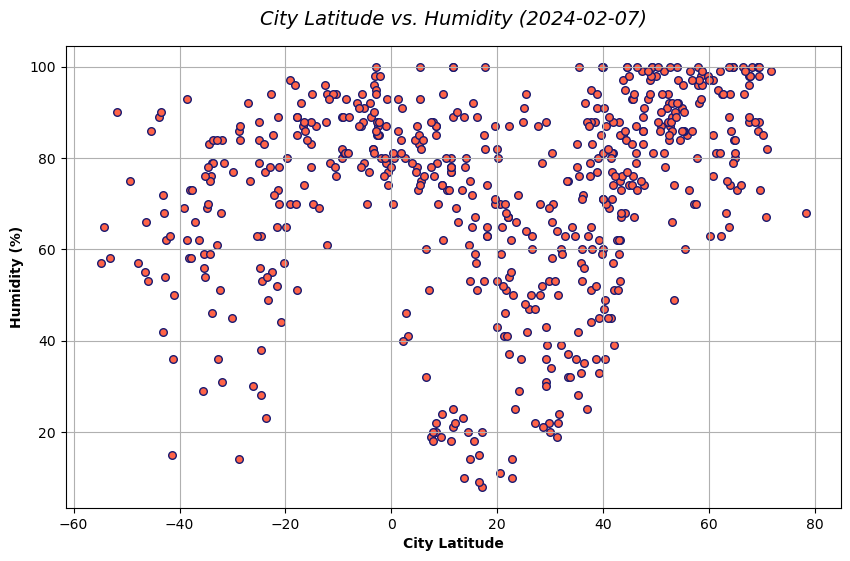

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Step 2: Generate a scatter plot based with added customization
pyplt.title(f"City Latitude vs. Humidity ({todays_date})", fontsize = 14, fontstyle = 'italic', pad = 15)
pyplt.xlabel("City Latitude", fontsize = 10, fontweight = 'bold')
pyplt.ylabel("Humidity (%)", fontsize = 10, fontweight = 'bold')
pyplt.scatter(x_values, y_values, edgecolor = "midnightblue", s = 30, color = "tomato")
pyplt.grid()

# Step 3: Save the figure
pyplt.savefig("output_data/Figure 2 - City Latitude vs. Humidity.png", bbox_inches = 'tight', dpi = 200)

# Step 4: Display the plot
pyplt.show()

#### Latitude Vs. Cloudiness

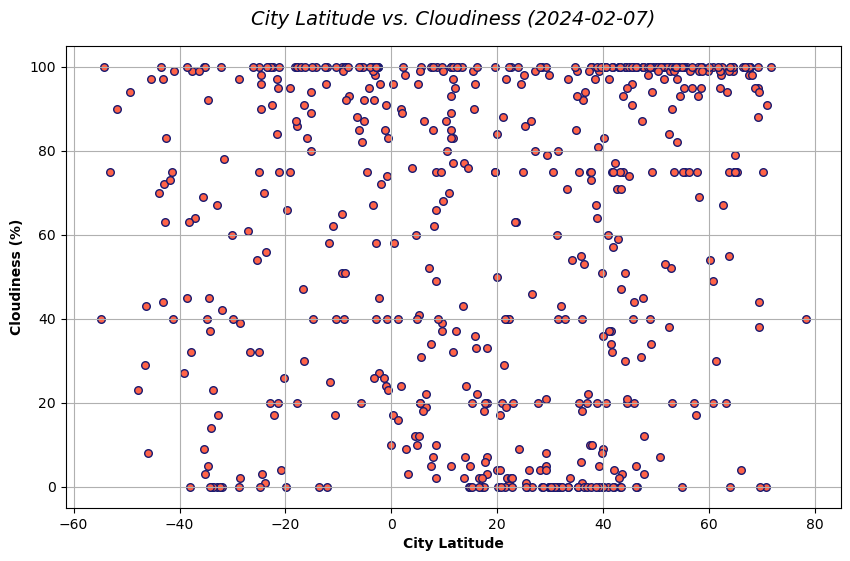

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Step 2: Generate a scatter plot based with added customization
pyplt.title(f"City Latitude vs. Cloudiness ({todays_date})", fontsize = 14, fontstyle = 'italic', pad = 15)
pyplt.xlabel("City Latitude", fontsize = 10, fontweight = 'bold')
pyplt.ylabel("Cloudiness (%)", fontsize = 10, fontweight = 'bold')
pyplt.scatter(x_values, y_values, edgecolor = "midnightblue", s = 30, color = "tomato")
pyplt.grid()

# Step 3: Save the figure
pyplt.savefig("output_data/Figure 3 - City Latitude vs. Cloudiness.png", bbox_inches = 'tight', dpi = 200)

# Step 4: Display the plot
pyplt.show()

#### Latitude vs. Wind Speed Plot

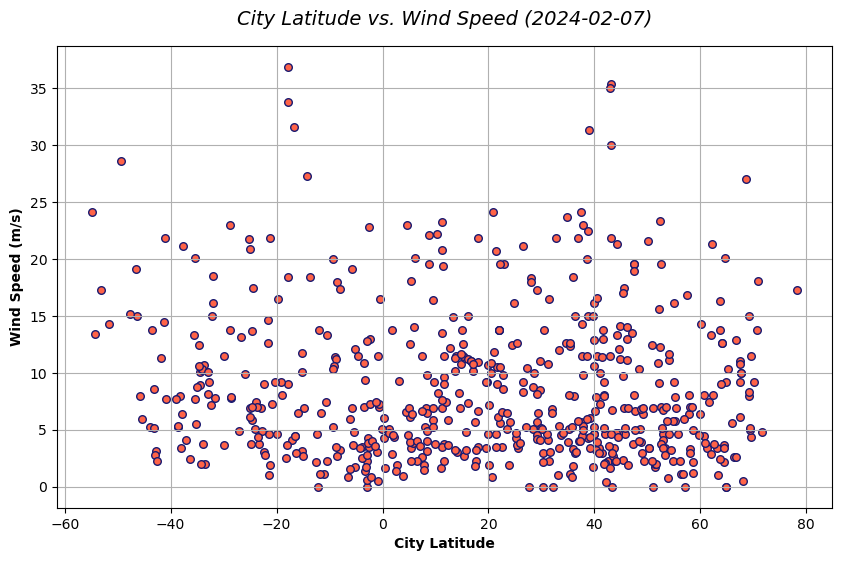

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Step 2: Generate a scatter plot based with added customization
pyplt.title(f"City Latitude vs. Wind Speed ({todays_date})", fontsize = 14, fontstyle = 'italic', pad = 15)
pyplt.xlabel("City Latitude", fontsize = 10, fontweight = 'bold')
pyplt.ylabel("Wind Speed (m/s)", fontsize = 10, fontweight = 'bold')
pyplt.scatter(x_values, y_values, edgecolor = "midnightblue", s = 30, color = "tomato")
pyplt.grid()

# Step 3: Save the figure
pyplt.savefig("output_data/Figure 4 - City Latitude vs. Wind Speed.png", bbox_inches = 'tight', dpi = 200)

# Step 4: Display the plot
pyplt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x_values, y_values, x_label, y_label, hemisphere, line_eq_text_coordinates):
    
    # Step 1: Use the linear regression scipy class
    result_regression = linregress(x_values, y_values)
    # Calculate the slope and intercept of the desired linear regression equation
    slope = result_regression[0]; intercept = result_regression[1];
    
    # Step 2: Generate the line equation for the regression
    # Use ANSI Escape code for bold text for formating the result
    regress_values = x_values * slope + intercept
    linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"Linear Regression Line Equation: \033[1m{linear_equation}\033[0m")

    # Step 3: Generate the linear regression plot based on the above values with customization
    pyplt.rcParams['figure.figsize'] = [10, 6]
    pyplt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}", fontsize = 14, fontstyle = 'italic', pad = 15)
    pyplt.xlabel(x_label, fontsize = 10, fontweight = 'bold')
    pyplt.ylabel(y_label, fontsize = 10, fontweight = 'bold')
    pyplt.scatter(x_values, y_values, edgecolor = "midnightblue", s = 30, color = "lightcoral")
    pyplt.annotate(linear_equation, xy = line_eq_text_coordinates, fontsize=12, color="darkviolet")
    pyplt.plot(x_values, regress_values, '-g')
    
    # Step 4: Use Pearson's correlation method to compute the correlation coffecient for the given data
    # Note: Round to two decimal places and get the first value of the result
    # Use ANSI Escape code for bold text for formating the result
    correlation_coeff = round(st.pearsonr(x_values, y_values)[0],2)
    print(f"The r-value (correlation coefficient) of this relationship is: \033[1m{correlation_coeff}\033[0m")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head().style.set_table_styles([df_header_row])

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Cabo San Lucas,22.890900,-109.912400,77.310000,50,20,19.570000,MX,1707345290
1,Novodvinsk,64.416500,40.812200,-20.220000,100,99,3.690000,RU,1707345290
2,Constanța,44.183300,28.650000,45.280000,68,100,13.330000,RO,1707345245
4,George Town,5.411200,100.335400,80.530000,93,20,3.440000,MY,1707345292
5,Hawaiian Paradise Park,19.593300,-154.973100,76.510000,87,100,3.440000,US,1707345292


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head().style.set_table_styles([df_header_row])

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,New Norfolk,-42.782600,147.058700,66.700000,54,63,3.180000,AU,1707345291
7,Port-aux-Français,-49.350000,70.216700,40.510000,75,94,28.590000,TF,1707345293
9,Puerto Natales,-51.723600,-72.487500,46.850000,90,90,14.320000,CL,1707345294
10,Margaret River,-33.950000,115.066700,67.510000,46,0,3.760000,AU,1707345112
16,Ushuaia,-54.800000,-68.300000,49.660000,57,40,24.160000,AR,1707345297


###  Temperature vs. Latitude Linear Regression Plot

Linear Regression Line Equation: y = -1.35x + 93.14
The r-value (correlation coefficient) of this relationship is: -0.84


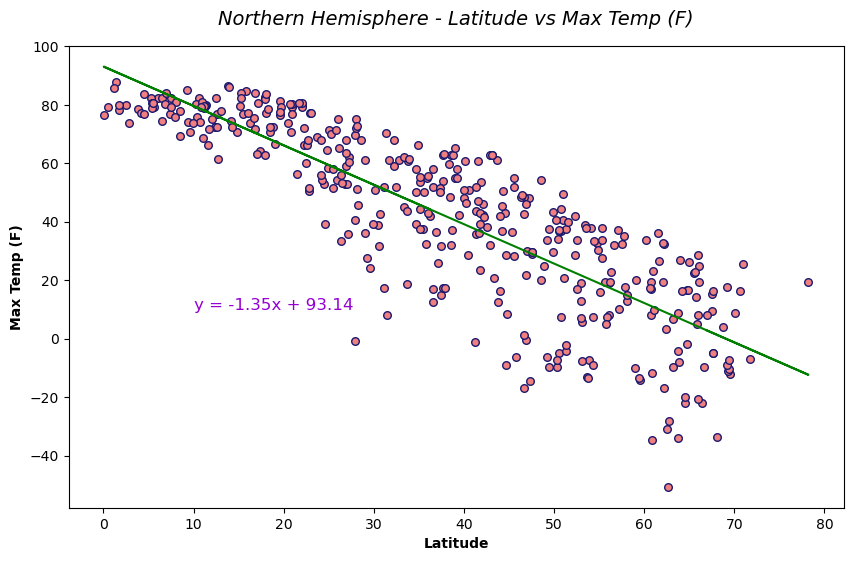

In [15]:
# Linear regression on Northern Hemisphere
# Step 1: Define the axes values for the plot 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Step 2: Call the Linear Regression function defined earlier with relevant arguments as parameters
linear_regression_plot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Step 3: Save the figure
pyplt.savefig("./output_data/Figure 5 - North_Hemi Latitude vs. Max Temperature.png", bbox_inches="tight", dpi = 200)

# Step 4: Display the plot
pyplt.show()

Linear Regression Line Equation: y = 0.36x + 82.74
The r-value (correlation coefficient) of this relationship is: 0.49


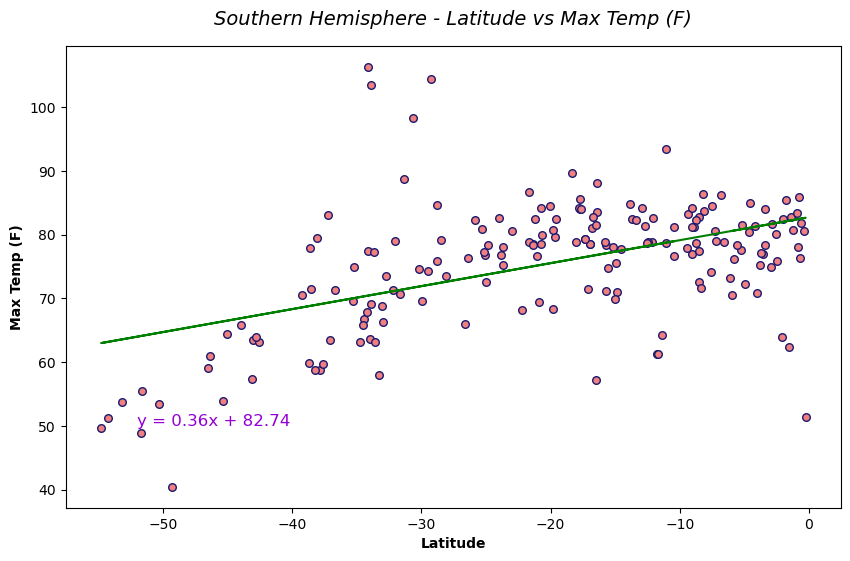

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Step 2: Call the Linear Regression function defined earlier with relevant arguments as parameters
linear_regression_plot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 50))

# Step 3: Save the figure
pyplt.savefig("./output_data/Figure 6 - South_Hemi Latitude vs. Max Temperature.png", bbox_inches="tight", dpi = 200)

# Step 4: Display the plot
pyplt.show()

#### Observation and Insights:
---
- *Latitude vs. Maximum Temperature Linear Relationship*: For both the northern and southern hemispheres, based on the regression analysis, it is evident that the correlation between latitude and maximum temperature across cities is strong.<br>
- *Correlation of the linear relationship*: Northern hemisphere has a higher correlation (*0.84*) than the Southern Hemisphere (*0.49*). This indicates that as we move further away from the equator the drop in temperatures is more linear in relationship than the corresponding increase in temperature in southern hemisphere by approaching closer to the equator (latitude = 0).<br>
---

### Humidity vs. Latitude Linear Regression Plot

Linear Regression Line Equation: y = 0.57x + 50.76
The r-value (correlation coefficient) of this relationship is: 0.47


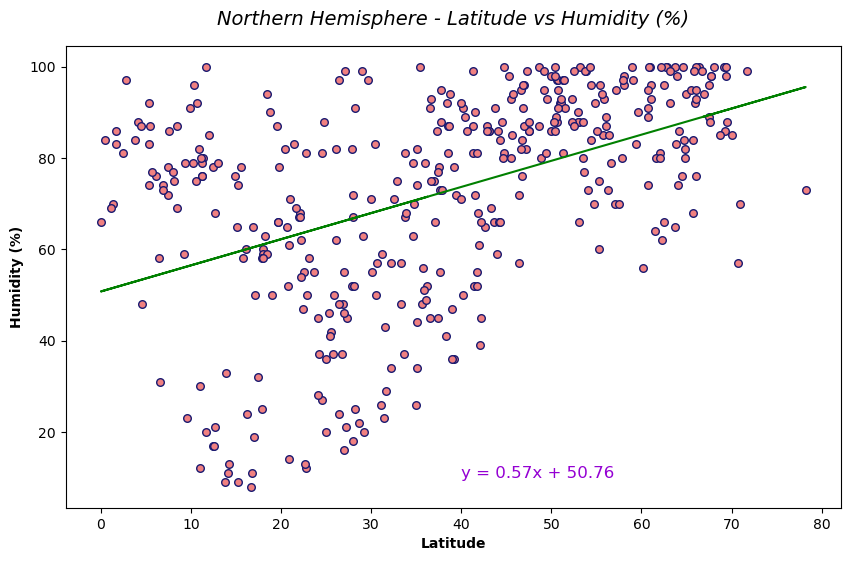

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Step 2: Call the Linear Regression function defined earlier with relevant arguments as parameters
linear_regression_plot(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (40, 10))

# Step 3: Save the figure
pyplt.savefig("./output_data/Figure 7 - North_Hemi Latitude vs. Humidity.png", bbox_inches="tight", dpi = 200)

# Step 4: Display the plot
pyplt.show()

Linear Regression Line Equation: y = 0.5x + 85.25
The r-value (correlation coefficient) of this relationship is: 0.4


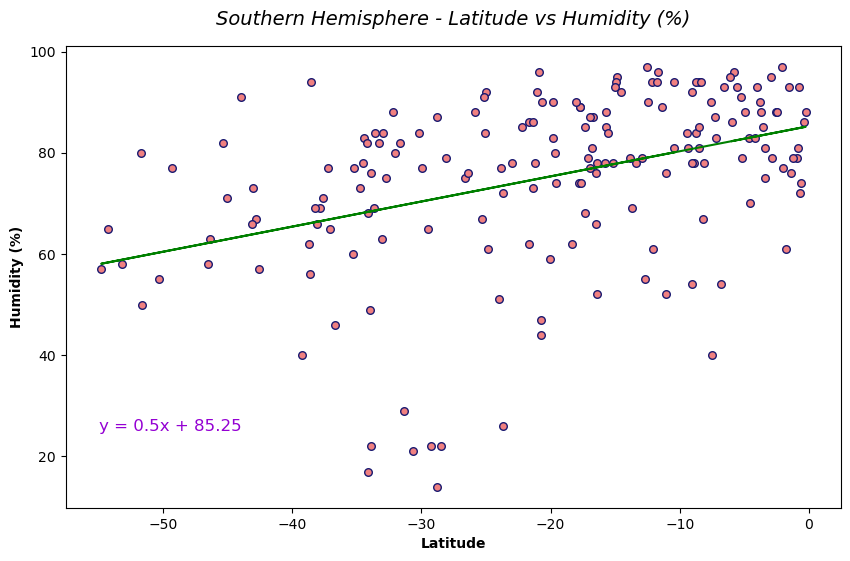

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Step 2: Call the Linear Regression function defined earlier with relevant arguments as parameters
linear_regression_plot(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (-55, 25))

# Step 3: Save the figure
pyplt.savefig("./output_data/Figure 7 - South_Hemi Latitude vs. Humidity.png", bbox_inches="tight", dpi = 200)

# Step 4: Display the plot
pyplt.show()

#### Observation and Insights:
---
- *Latitude vs. Humidity Linear Relationship*: For both the northern and southern hemispheres, based on the regression analysis, there is weak correlation between latitude and humidity across cities.<br>
- *Correlation of the linear relationship*: Northern hemisphere has a slightly higher correlation (*0.47*) than the Southern Hemisphere (*0.40*) with cities in a higher latitude having a more linear relationship to humidity. However, the Southern hemisphere seems to have very little to no correlation with values spread across the scatter plot showing this relationship.<br>
---

### Cloudiness vs. Latitude Linear Regression Plot

Linear Regression Line Equation: y = 0.7x + 35.34
The r-value (correlation coefficient) of this relationship is: 0.34


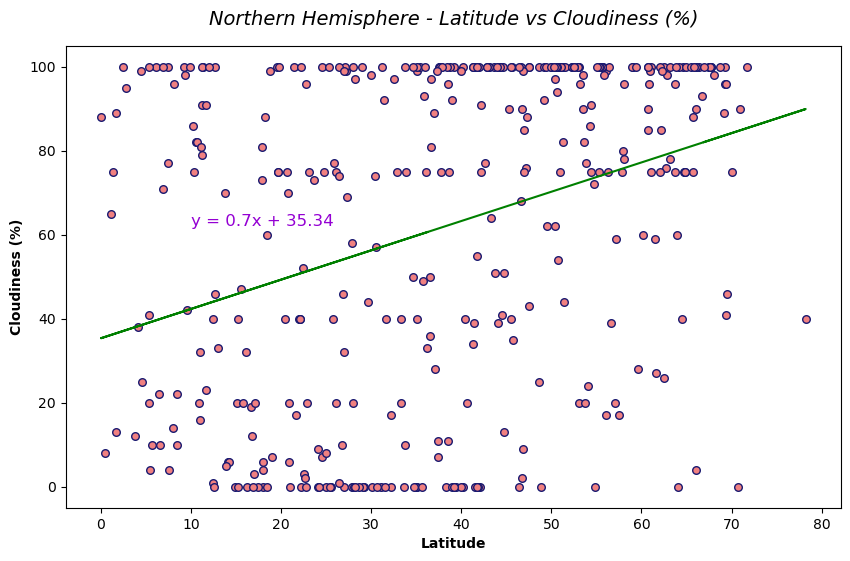

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Step 2: Call the Linear Regression function defined earlier with relevant arguments as parameters
linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (10, 62))

# Step 3: Save the figure
pyplt.savefig("./output_data/Figure 8 - North_Hemi Latitude vs. Cloudiness.png", bbox_inches="tight", dpi = 200)

# Step 4: Display the plot
pyplt.show()

Linear Regression Line Equation: y = 0.29x + 69.26
The r-value (correlation coefficient) of this relationship is: 0.11


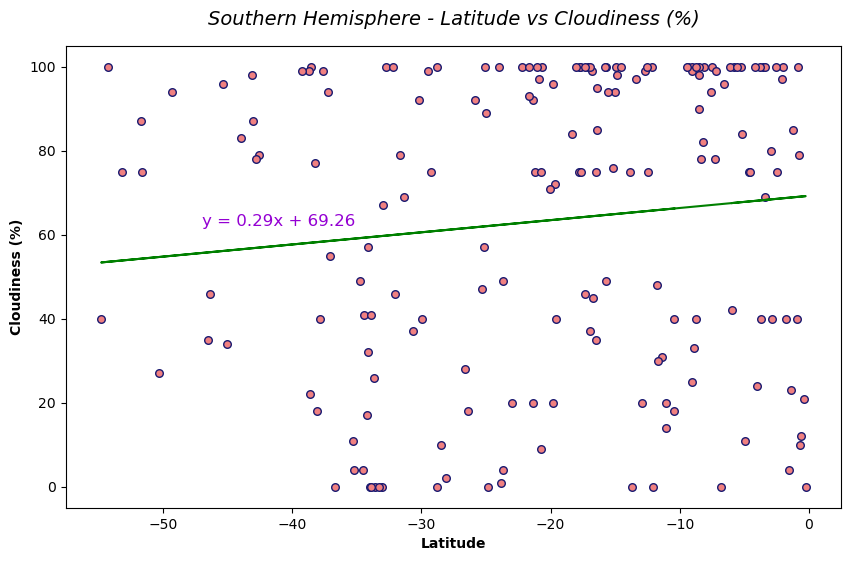

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Step 2: Call the Linear Regression function defined earlier with relevant arguments as parameters
linear_regression_plot(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern", (-47, 62))

# Step 3: Save the figure
pyplt.savefig("./output_data/Figure 9  - South_Hemi Latitude vs. Cloudiness.png", bbox_inches="tight", dpi = 200)

# Step 4: Display the plot
pyplt.show()

#### Observation and Insights:
---
- *Latitude vs. Cloudiness Linear Relationship*: For both the northern and southern hemispheres, based on the regression analysis, there is hardly **any** correlation between latitude and cloudiness across cities.The scatter plot for each of these shows values that are distributed all over the place. <br>
- *Correlation of the linear relationship*: Northern hemisphere has a slightly higher correlation (*0.34*) than the Southern Hemisphere (*0.11*) in this relationship. However, there is no clear linear relationship for either hemispheres in this regard, as the values seem to be distributed across latitudes for each plot.<br>
---

### Wind Speed vs. Latitude Linear Regression Plot

Linear Regression Line Equation: y = -0.04x + 10.35
The r-value (correlation coefficient) of this relationship is: -0.12


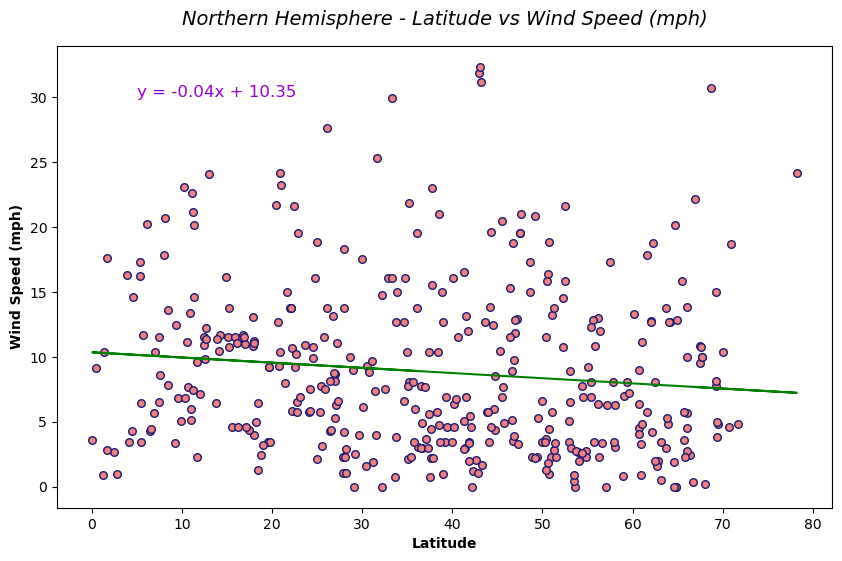

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Step 2: Call the Linear Regression function defined earlier with relevant arguments as parameters
linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern", (5, 30))

# Step 3: Save the figure 
pyplt.savefig("./output_data/Figure 10 - North_Hemi Latitude vs. Wind Speed.png", bbox_inches="tight", dpi = 200)

# Step 4: Display the plot
pyplt.show()

Linear Regression Line Equation: y = -0.13x + 5.89
The r-value (correlation coefficient) of this relationship is: -0.25


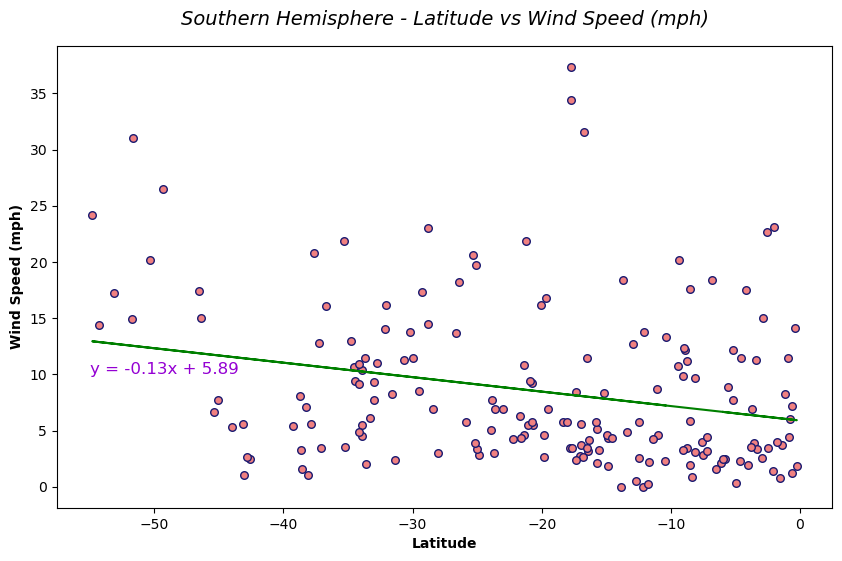

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Step 2: Call the Linear Regression function defined earlier with relevant arguments as parameters
linear_regression_plot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern", (-55, 10))

# Step 3: Save the figure
pyplt.savefig("./output_data/Figure 11 - South_Hemi Latitude vs. Wind Speed.png", bbox_inches="tight", dpi = 200)

# Step 4: Display the plot
pyplt.show()

#### Observation and Insights:
---
- *Latitude vs. Wind Speed Linear Relationship*: For both the northern and southern hemispheres, based on the regression analysis, there is hardly **any** correlation between latitude and cloudiness across cities. The scatter plot for each of these shows values that are distributed all over across latitudes. <br>
- *Correlation of the linear relationship*: The Northern hemisphere has a slightly higher correlation (*-0.12*) than the Southern Hemisphere (*-0.25*) in this relationship. However, for cities that are closer to the equator in either hemisphere (*from 0 degree to around 40 degrees*), both hemispheres seem to have similar wind speeds (in the range of 0 mph to 10 mph).<br>
---